# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata)

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [28]:
# Checking the number of mice.
len(combined_df['Mouse ID'].value_counts())

249

In [29]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# duplicates = combined_df[combined_df.duplicated()]
duplicates = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [30]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates_df = combined_df.loc[combined_df['Mouse ID'] == 'g989', :]
duplicates_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [31]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'].isin(duplicates) == False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [32]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].value_counts())

248

## Summary Statistics

In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({'Mean Tumor Volume': mean,
                        'Median Tumor Volume': median,
                        'Tumor Volume Variance': var,
                        'Tumor Volume Std. Dev.': std,
                        'Tumor Volume Std. Err.': sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [34]:
# Get the number of data points per Drug Regimen
mice_count = clean_df['Drug Regimen'].value_counts()
mice_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

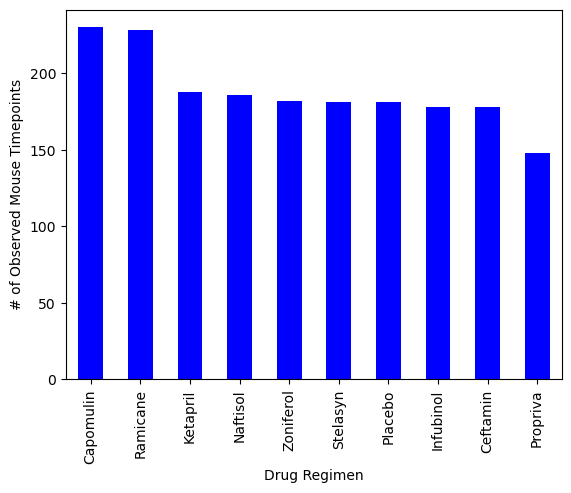

In [35]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_pandas = mice_count.plot.bar(color = 'b')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()


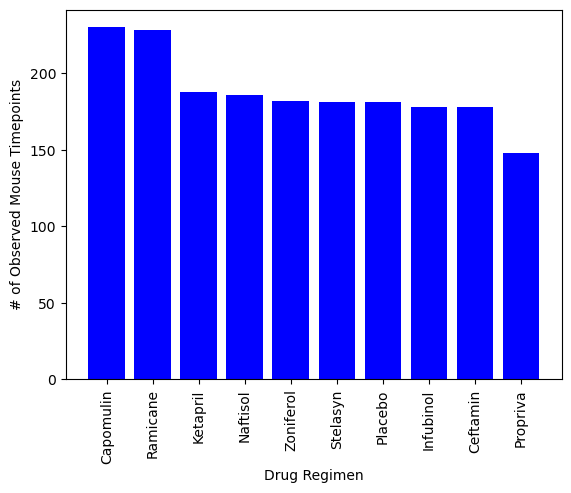

In [36]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, color = 'b', align = 'center')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation = 'vertical')
plt.show()

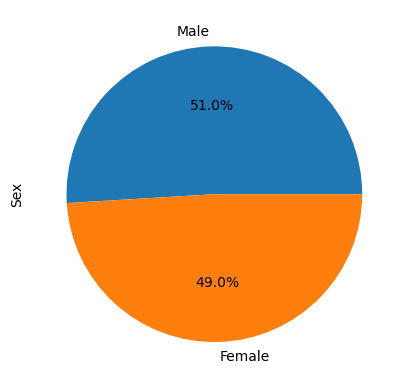

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas.
mice_gender = clean_df['Sex'].value_counts()
mice_gender.plot.pie(autopct = '%1.1f%%')
plt.ylabel('Sex')
plt.show()

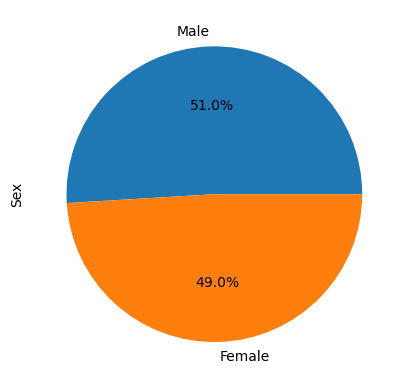

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender = clean_df['Sex'].value_counts()
plt.pie(mice_gender, labels=mice_gender.index, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

In [39]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_df = clean_df.groupby('Mouse ID')
last_timepoint_df = grouped_df['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_df, last_timepoint_df, on=["Mouse ID", "Timepoint"], how="inner")
print(merged_df)

    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       f932          0           45.000000                 0     Ketapril   
1       x336          0           45.000000                 0     Naftisol   
2       h428          0           45.000000                 0     Ketapril   
3       v199          0           45.000000                 0     Naftisol   
4       o848          0           45.000000                 0     Stelasyn   
..       ...        ...                 ...               ...          ...   
243     r944         45           41.581521                 2    Capomulin   
244     u364         45           31.023923                 3    Capomulin   
245     p438         45           61.433892                 1     Ceftamin   
246     x773         45           58.634971                 4      Placebo   
247     b879         45           72.555239                 2     Stelasyn   

        Sex  Age_months  Weight (g)  
0      Male          15  

In [42]:
# Define a list of treatment names
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to store the final tumor volume data
tumor_volume_data = []

# Display the list of treatment names and the empty list
print("Treatment Names:", treatments)
print("Tumor Volume Data:", tumor_volume_data)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
treatment_data = merged_df.loc[merged_df["Drug Regimen"] == "treatment", "Tumor Volume (mm3)"]
quartiles = treatment_data.quantile([0.25, 0.75])
Q1 = quartiles[0.25]
Q3 = quartiles[0.75]
IQR = Q3 - Q1
    
# Locate the rows which contain mice on each drug and get the tumor volumes

    
# add subset 

    
# Determine outliers using upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Treatment Names: ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
Tumor Volume Data: []
